<a href="https://colab.research.google.com/github/nabilanewaz/ML/blob/main/Nabila_Newaz_210041216_Regularization_In_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets

### Data


In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=30, n_features=1)
y = np.array([[i] for i in y])

In [ ]:
mu= 0 # mean
sigma = 10 # standard deviation
s = np.random.normal(mu, sigma, 30)
s = np.array([[i] for i in s])
y = y + s

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler = MinMaxScaler()
scaler.fit(y)
y = scaler.transform(y)

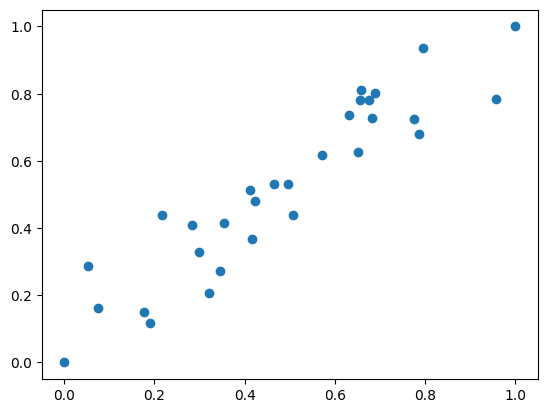

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_main, X_test_main, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### polynomial features to data


In [ ]:
# Create a high-degree polynomial model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(15)
X_train = poly.fit_transform(X_train_main)
X_test = poly.fit_transform(X_test_main)

### utility function

In [ ]:
# Generate lots of points in order to plot the polynomial
xx = np.linspace(0,1,500)
qx = np.array([[i] for i in xx])
X_plot_pred = poly.fit_transform(qx)

### Linear Regression without Regularization:


In [ ]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [ ]:
class LinearRegression:
  def __init__(self, learning_rate=0.1, no_of_iterations=50):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.weights = None
    self.bias = None
    self.cost_list = []

  def fit(self, X, y):
    n_samples, n_features = X.shape
    if y.ndim == 1:
      y = y.reshape(-1, 1)
    self.weights = np.zeros((n_features, 1))
    self.bias = 0

    for _ in range(self.no_of_iterations):
      y_predicted = np.dot(X, self.weights) + self.bias
      cost = mse(y, y_predicted)
      self.cost_list.append(cost)

      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    return (np.dot(X, self.weights) + self.bias).flatten()

In [ ]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 7)  # random_state == seed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

print("shapes: x:", X.shape, "\t\t y:", y.shape)
print("shapes: X_train:", X_train.shape, "\t y_train:" ,y_train.shape)
print("shapes: X_test:", X_test.shape, "\t y_test:" , y_test.shape)

shapes: x: (100, 1) 		 y: (100,)
shapes: X_train: (80, 1) 	 y_train: (80,)
shapes: X_test: (20, 1) 	 y_test: (20,)


In [ ]:
lin_reg = LinearRegression(learning_rate = 0.001, no_of_iterations = 100000)
lin_reg.fit(X_train, y_train)

In [ ]:
qy = lin_reg.predict(X_test)

In [ ]:
# MEAN SQUARED ERROR  for the predicted values
MSE = mse(y_test, qy)  # y_test are the true values
print(MSE)

In [ ]:
# Filter so that the polynomial doesn't go off the graph.
qq = []
for i in qy:
    if i <= 1 and i >= 0:
        qq.append(i[0])
    else:
        qq.append(0)
qq = np.array(qq)

ValueError: x and y must have same first dimension, but have shapes (500,) and (20,)

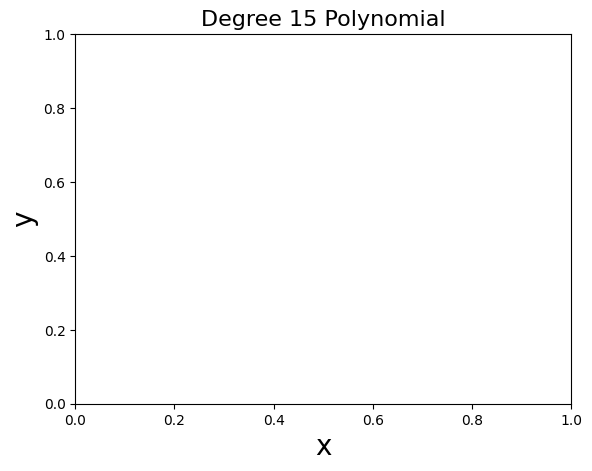

In [ ]:
## plot
qyy = lin_reg.predict(X_test)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel('y', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_title('Degree 15 Polynomial', fontsize=16)

plt.plot(xx, qyy, color='red', label="complex model")
plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_test, y_test, color="green", marker="x", label="test data", s=60)

plt.legend(prop={'size': 12})

### Regularization:

In [ ]:
class RidgeRegression:
  def __init__(self, alpha=.1, learning_rate=0.1, no_of_iterations=50):
    self.alpha = alpha
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.weights = None
    self.bias = None
    self.cost_list = []

  def fit(self, X, y):
    n_samples, n_features = X.shape
    if y.ndim == 1:
      y = y.reshape(-1, 1)
    self.weights = np.zeros((n_features, 1))
    self.bias = 0

    for _ in range(self.no_of_iterations):
      y_predicted = np.dot(X, self.weights) + self.bias
      cost = mse(y, y_predicted)
      self.cost_list.append(cost)

      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  + (self.alpha / n_samples) * self.weights
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    return (np.dot(X, self.weights) + self.bias).flatten()

In [ ]:
ridge_regression = RidgeRegression(alpha=1, learning_rate = 0.001, no_of_iterations = 10000)
ridge_regression.fit(X_train, y_train)

In [ ]:
qq_2 = ridge_regression.predict(X_test)

In [ ]:
# MEAN SQUARED ERROR  for the predicted values
MSE = mse(y_test, qq_2)  # y_test are the true values
print(MSE)

384.0771206147287


ValueError: x and y must have same first dimension, but have shapes (500, 1) and (20,)

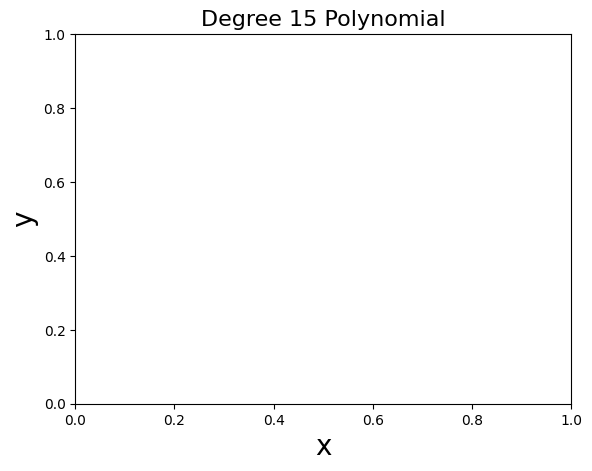

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel('y', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_title('Degree 15 Polynomial', fontsize=16)

plt.plot(xx, qq_2, color='red', label="complex model")
plt.scatter(X_train_main, y_train, label="training data")
plt.scatter(X_test_main, y_test, color="green", marker="x", label="test data", s=60)